In [1]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image  
import pydotplus
from graphviz import Digraph


In [2]:
# Read the data as a DF
df=pd.read_csv("bank-full.csv")

In [3]:
# Top 10 rows
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

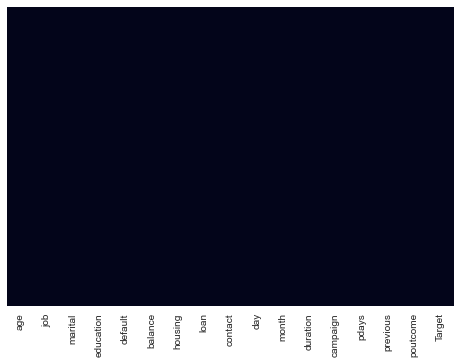

In [6]:
#visualiation of misssing value in heat map
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns
print(continous_vars)

Continuous Variables 

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [10]:
print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Categorical Variables 

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')


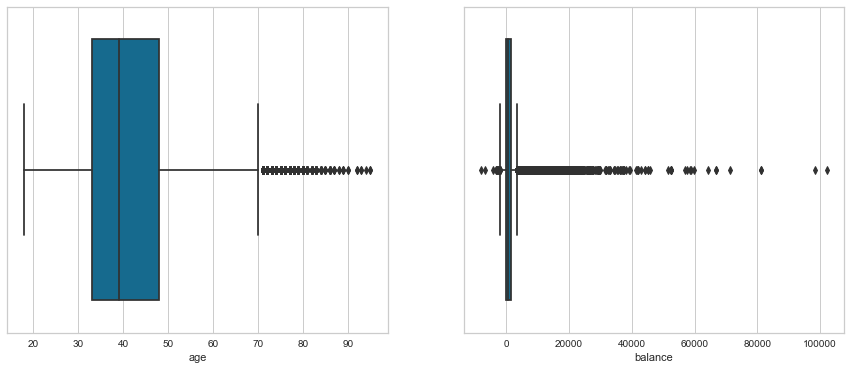

In [11]:
# Check for outliers
fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['age'],ax=a)
sns.boxplot(df['balance'],ax=b)

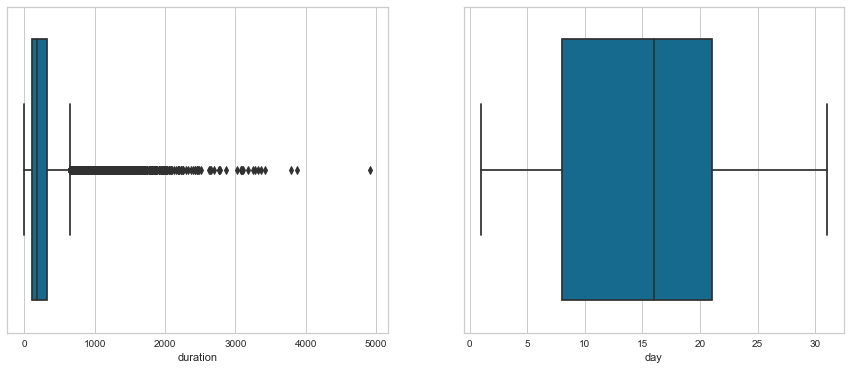

In [12]:
# Check for outliers in duration and day column
fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['duration'],ax=a)
sns.boxplot(df['day'],ax=b)

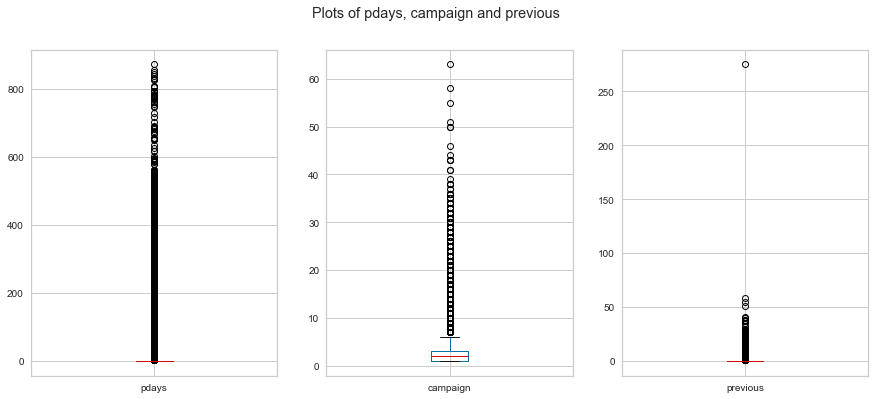

In [13]:
#showing outlers in duration and campaign cloumn
distribution_duration_campaign = df[['pdays','campaign','previous']].plot(kind = 'box', 
                                                      figsize = (15,6),
                                                      subplots = True, layout = (1,3),
                                                      sharex = False, sharey = False,
                                                      title='Plots of pdays, campaign and previous')
plt.show()

Continuous Variables Visualization 



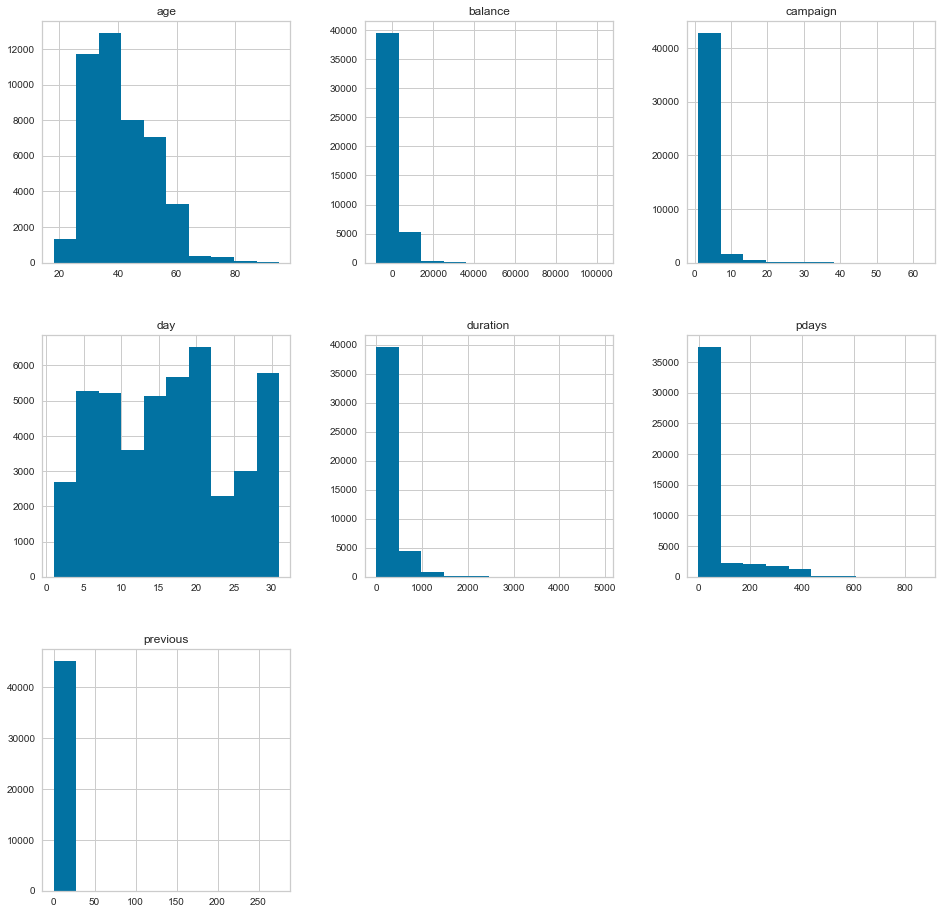

In [14]:
print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(16,16))
plt.show()

In [15]:
df.skew()  # will show you the skewness of each column numerical

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

Categorical Variables Visualization 



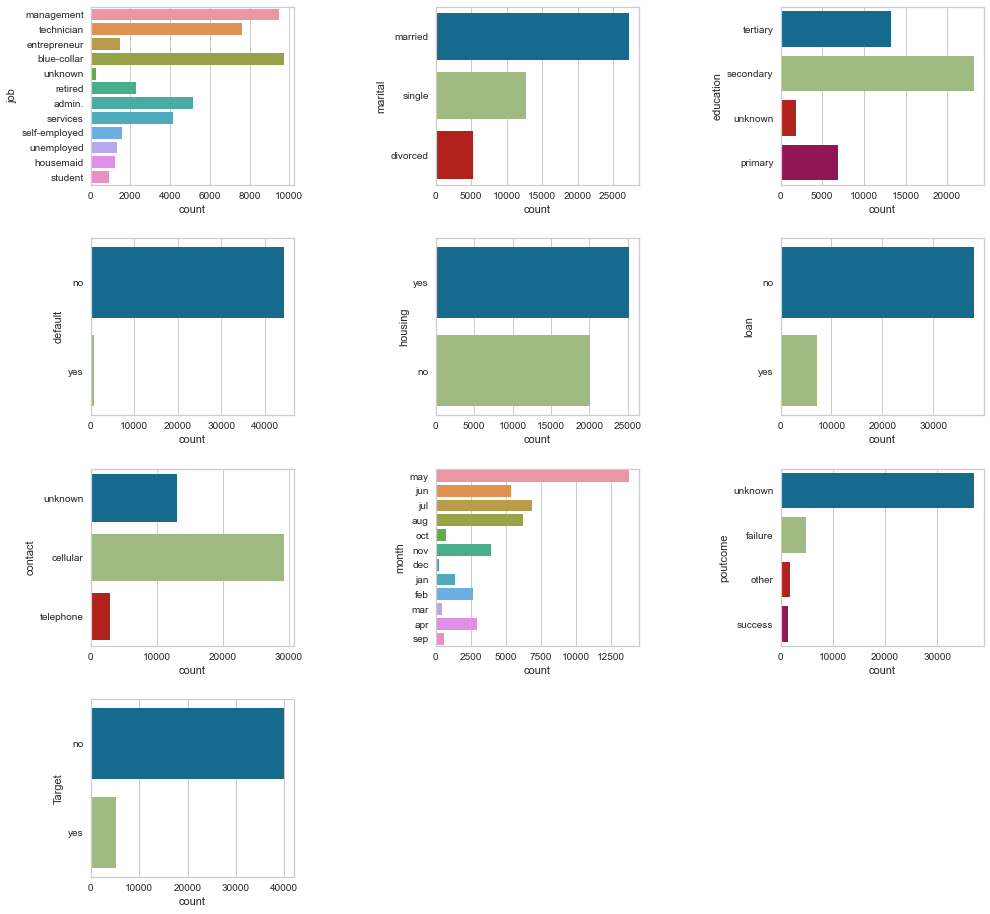

In [16]:
print("Categorical Variables Visualization","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    # change axes to y to see clear text labels
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
    
plt.show()

In [17]:
# Yes/No ratio is imbalanced
target=df['Target'].value_counts()
target

no     39922
yes     5289
Name: Target, dtype: int64

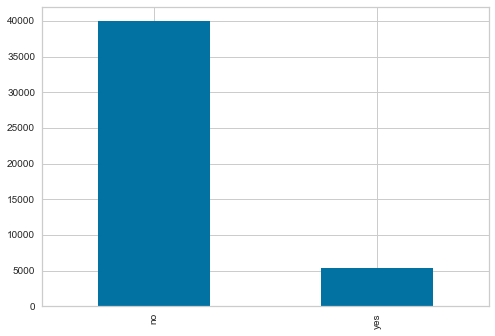

In [18]:
target.plot(kind='bar')

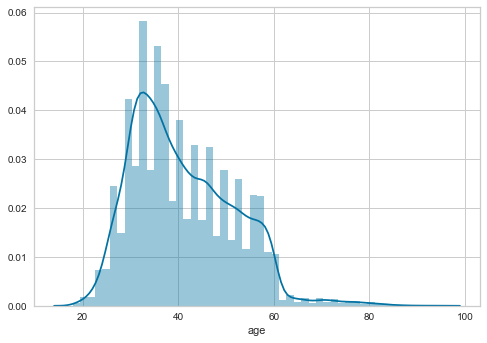

In [19]:
sns.distplot(df.age) # People age between 25 to 45 are relatively high dataset

In [20]:
# Find Yes/No %
count_no = len(df[df.Target == 'no'])
count_yes = len(df[df.Target == 'yes'])
print('Percentage of "No": {:.3f}%'. format((count_no/(len(df.Target))*100)))
print('Percentage of "Yes": {:.3f}%'. format((count_yes/(len(df.Target))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


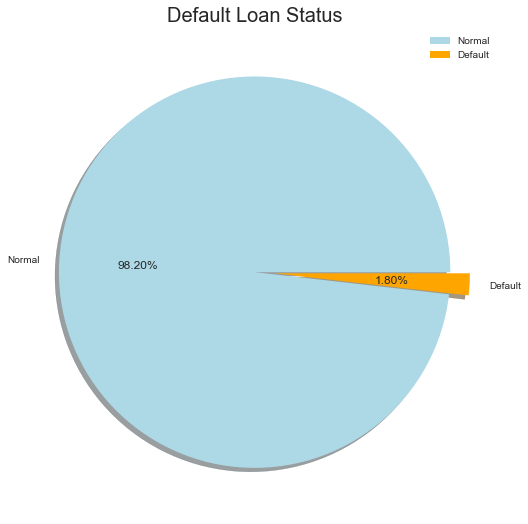

In [21]:
# Visualize percentage of loan defaults
labels = ['Normal', 'Default']
size = df['default'].value_counts()
colors = ['lightblue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Default Loan Status', fontsize = 20)
plt.legend()
plt.show()

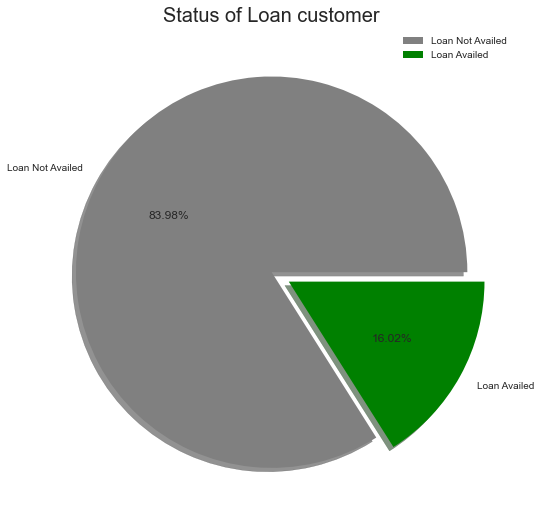

In [22]:
# Visualize percentage of loan availed

labels = ['Loan Not Availed','Loan Availed']
size = df['loan'].value_counts()
colors = ['grey', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Loan customer', fontsize = 20)
plt.legend()
plt.show()

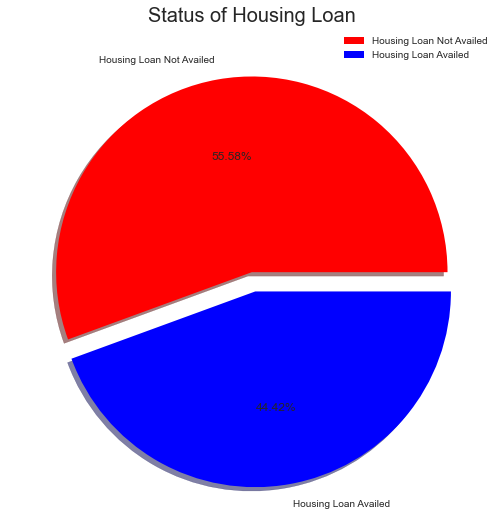

In [23]:
# Visualize percentage of housing loan availed

labels = ['Housing Loan Not Availed','Housing Loan Availed' ]
size = df['housing'].value_counts()
colors = ['red', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Housing Loan', fontsize = 20)
plt.legend()
plt.show()

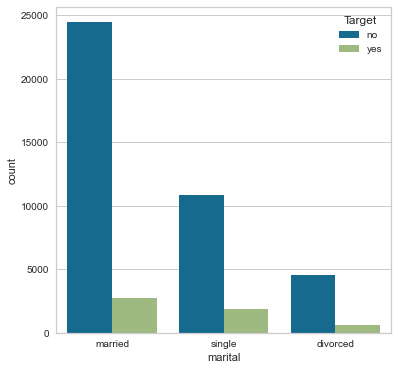

In [24]:
# Bivariate Analysis
# Marital vs Target

# People who are married tends to be subscribed more
plt.figure(figsize=(6,6))
sns.countplot(df['marital'],hue=df['Target'])


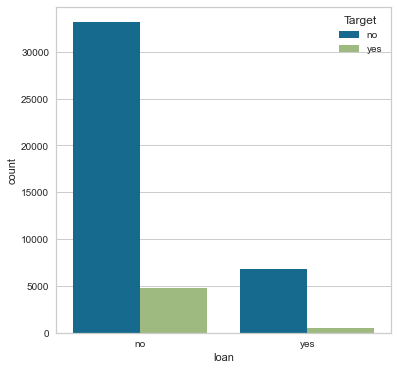

In [25]:
# Loan vs Target

# People who are subscribed are having less loan and people who are having more loans are not subscribed.

plt.figure(figsize=(6,6))
sns.countplot(df['loan'],hue=df['Target'])


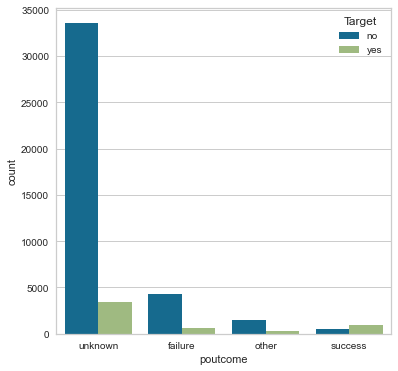

In [26]:
# Poutcome vs Target

# unknown column with target tends to be high on both subscribed/not subscribed.

plt.figure(figsize=(6,6))
sns.countplot(df['poutcome'],hue=df['Target'])

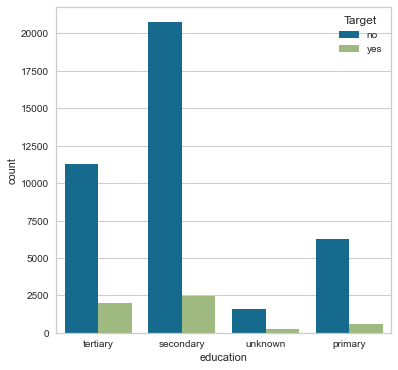

In [27]:
# Education vs Target

# People with secondary education are subscribed more

plt.figure(figsize=(6,6))
sns.countplot(df['education'],hue=df['Target'])

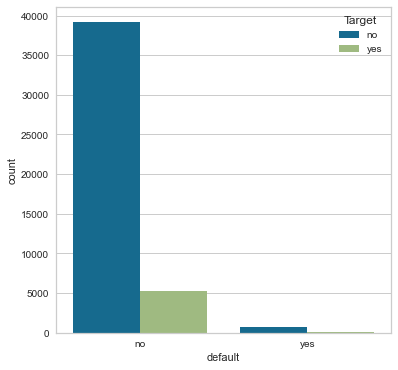

In [28]:
# Default vs Target

# People who are not default in loans are subscribed more

plt.figure(figsize=(6,6))
sns.countplot(df['default'],hue=df['Target'])

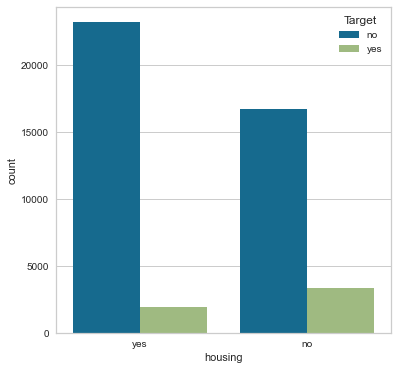

In [29]:
# Housing vs Target

# People who dont have housing loan are subscribed more.

plt.figure(figsize=(6,6))
sns.countplot(df['housing'],hue=df['Target'])

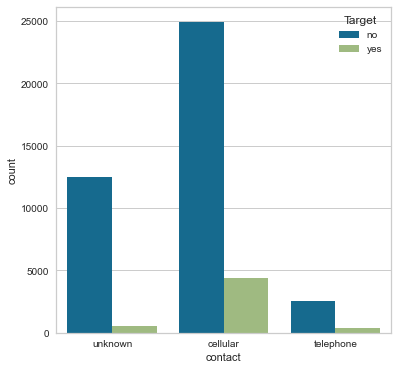

In [30]:
# Contact vs Target

# People who are having cellphones are subscribed more

plt.figure(figsize=(6,6))
sns.countplot(df['contact'],hue=df['Target'])

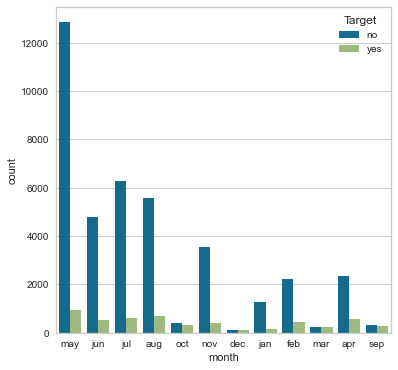

In [31]:
# Month vs Target

# People are subsribed in the may, june, july, aug, oct are more

plt.figure(figsize=(6,6))
sns.countplot(df['month'],hue=df['Target'])

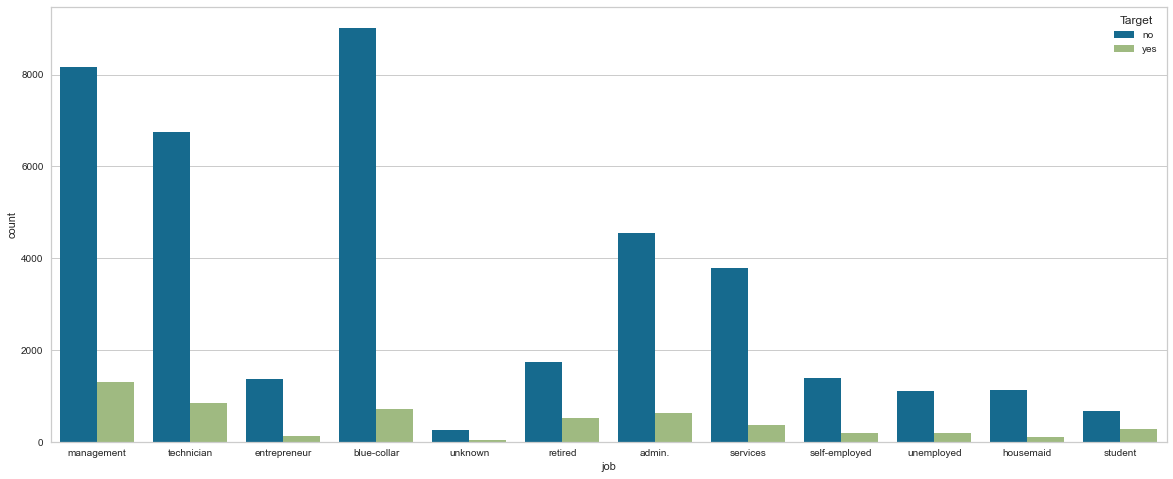

In [32]:
# Job vs Target

# People belongs to management, technician, bluecollar are subscribed more compared to other job types 
# Also people who are not subscribed tends to be high compared to other jobs.

plt.figure(figsize=(20,8))
sns.countplot(df['job'],hue=df['Target'])

In [33]:
# Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [34]:
# # Visualize the distribution of 'duration' & 'campaign'
# Drop rows that 'duration' < 5s. People doesnt spend enough time on calls who spoke lessthan 5s
condition_lessthan_5s = (df['duration']<5/60)
df = df.drop(df[condition_lessthan_5s].index, axis = 0, inplace = False)

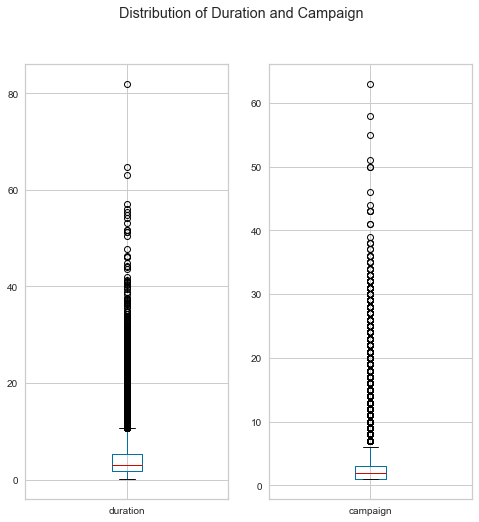

In [35]:
duration_campaign = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='Distribution of Duration and Campaign')
plt.show()

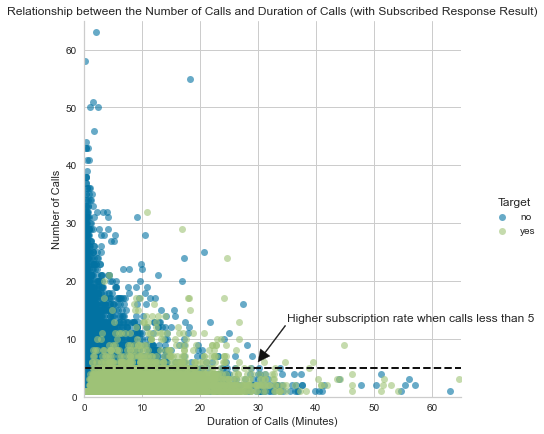

In [36]:
duration_campaign = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'Target',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =6)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('Relationship between the Number of Calls and Duration of Calls (with Subscribed Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls less than 5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

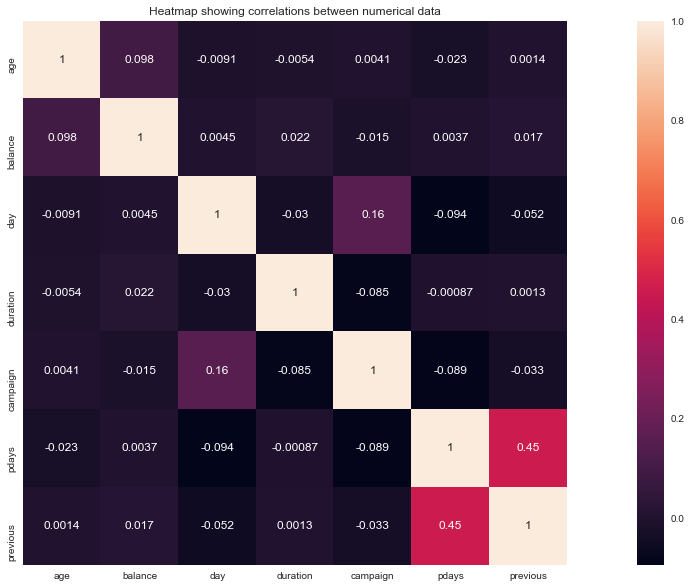

In [37]:
# Multivariate Analysis - Heat Map
correlation=df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.title('Heatmap showing correlations between numerical data')
plt.show()

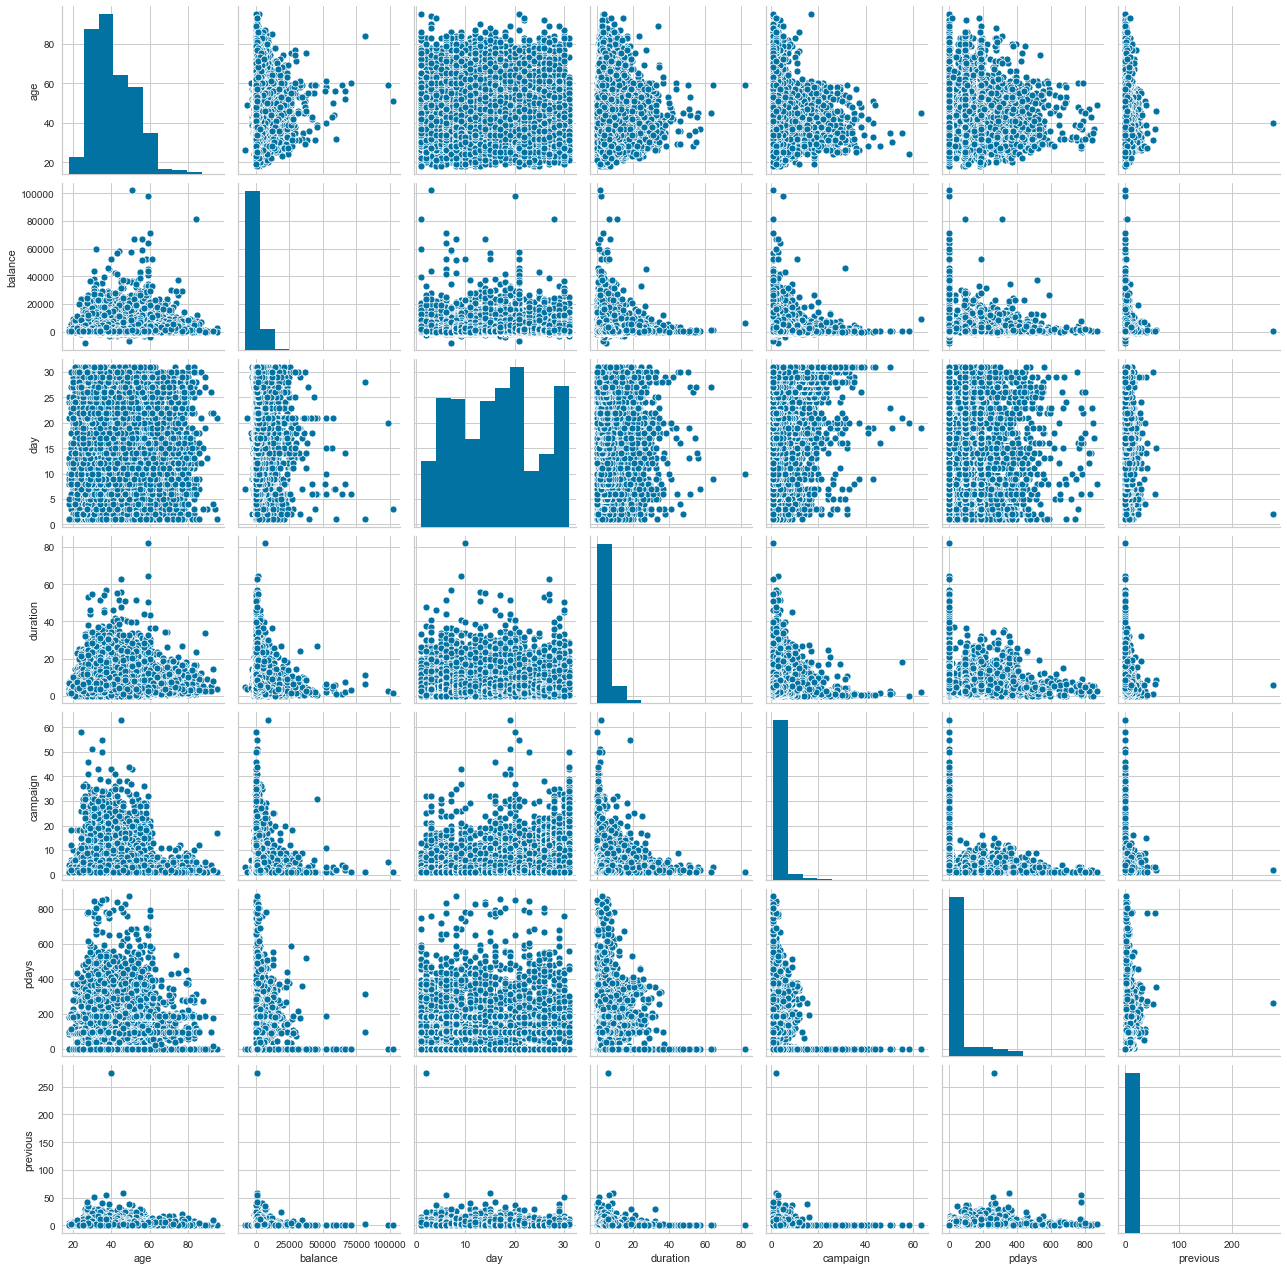

In [38]:
# Multivariate Analysis - Pair Plot
sns.pairplot(df)

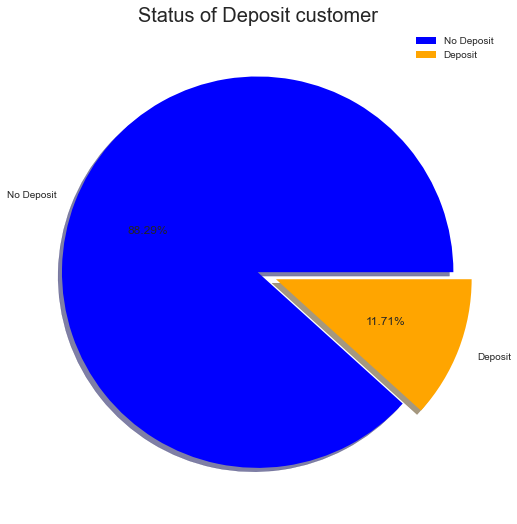

In [39]:
# Visualize Target coloumn distribution using pie plot

labels = ['No Deposit','Deposit']
size = df['Target'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Deposit customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [40]:
# Prepare the data 
# Delete the rows which column 'poutcome' contains 'other' which doesnt serve any purpose
condition_other = df.poutcome == 'other'
df = df.drop(df[condition_other].index, axis = 0, inplace = False)

In [41]:
# Fill 'unknown' value to 'other' in job and education to classify other bucket
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [42]:
# Drop pdays column  which doesnt serve any purpose
df = df.drop(columns = ['pdays'])

In [43]:
df.shape

(43312, 16)

In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,1.53,1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,3.30,1,0,unknown,no


In [45]:
# Step 1: Change column name: 'target' to 'y'
df.rename(index=str, columns={'Target': 'y'}, inplace = True)

In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.35,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.52,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.27,1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,1.53,1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,3.30,1,0,unknown,no


In [47]:
def convert(dataframe, new_column, old_column):
    dataframe[new_column] = dataframe[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataframe[new_column].value_counts()

convert(df, "y", "y")

0    38330
1     4982
Name: y, dtype: int64

In [48]:
#Convert categorical vriables to dummy variables

df_transform = pd.get_dummies(df, drop_first=True)
print("Number of features after one-hot encoding {}".format(len(list(df_transform))))

Number of features after one-hot encoding 41


In [49]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43312 entries, 0 to 45209
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43312 non-null  int64  
 1   balance              43312 non-null  int64  
 2   day                  43312 non-null  int64  
 3   duration             43312 non-null  float64
 4   campaign             43312 non-null  int64  
 5   previous             43312 non-null  int64  
 6   y                    43312 non-null  int64  
 7   job_blue-collar      43312 non-null  uint8  
 8   job_entrepreneur     43312 non-null  uint8  
 9   job_housemaid        43312 non-null  uint8  
 10  job_management       43312 non-null  uint8  
 11  job_other            43312 non-null  uint8  
 12  job_retired          43312 non-null  uint8  
 13  job_self-employed    43312 non-null  uint8  
 14  job_services         43312 non-null  uint8  
 15  job_student          43312 non-null  uint

In [50]:
# Apply Scaling  
std_scale = preprocessing.StandardScaler().fit(df_transform.drop('y', axis=1))
X = std_scale.transform(df_transform.drop('y', axis=1))
y = df_transform['y']

In [51]:
# Split Dataset

features = [col for col in df_transform.columns if col != 'y']

X_train, X_test, y_train, y_test = train_test_split(df_transform[features], df_transform['y'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 30318 samples.
Testing set has 12994 samples.


In [52]:
# Logistic Regression

logreg = LogisticRegression(random_state=1,fit_intercept=False)
logreg.fit(X_train, y_train)         

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(fit_intercept=False, random_state=1)

In [53]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [54]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.8944191569364733

Testing accuracy 0.8944128059104202

Confusion Matrix


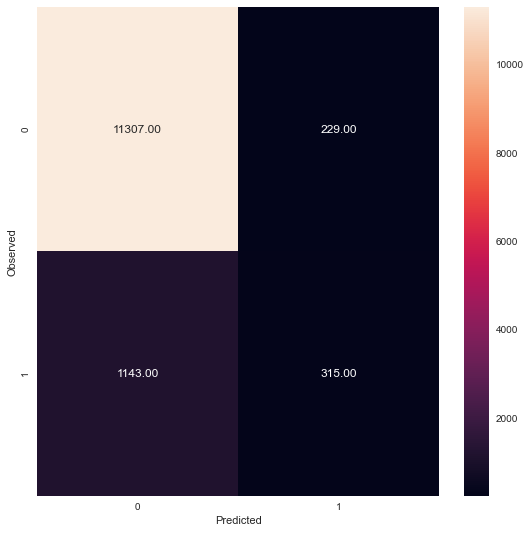

None
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11536
           1       0.58      0.22      0.31      1458

    accuracy                           0.89     12994
   macro avg       0.74      0.60      0.63     12994
weighted avg       0.87      0.89      0.87     12994



In [55]:


print("Training accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print(classification_report(y_test,y_predict))

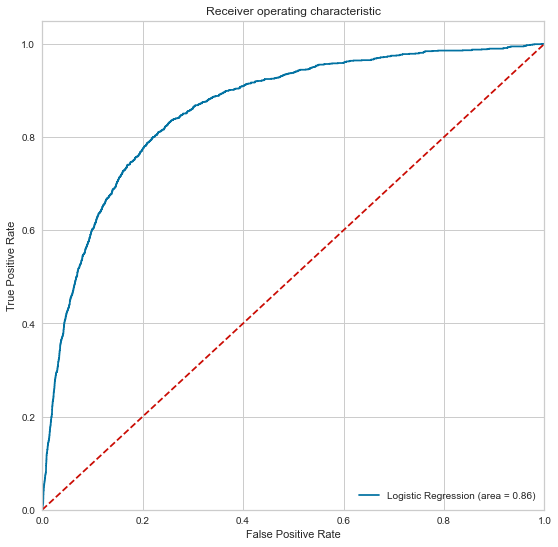

In [56]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_proba = logreg.predict_proba(X_test)[::,1]
logit_roc_auc = roc_auc_score(y_test,y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
auc_score = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[::,1])
round( float( auc_score ), 2 )

0.86

In [58]:
accuracy_LR = accuracy_score(y_test, y_predict)#lets keep score for final comparison

In [59]:
accuracy_LR

0.8944128059104202

In [60]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': [accuracy_LR]})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf


,Method,accuracy
0,Logistic Regression,0.894413


In [61]:
# Decision Tree Algorithm

model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


In [63]:
# Limit the Prune to max depth of 4
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=100)

In [64]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.90
Test: 0.90


In [65]:
# Visualize Tree

y_train.value_counts()


0    26794
1     3524
Name: y, dtype: int64

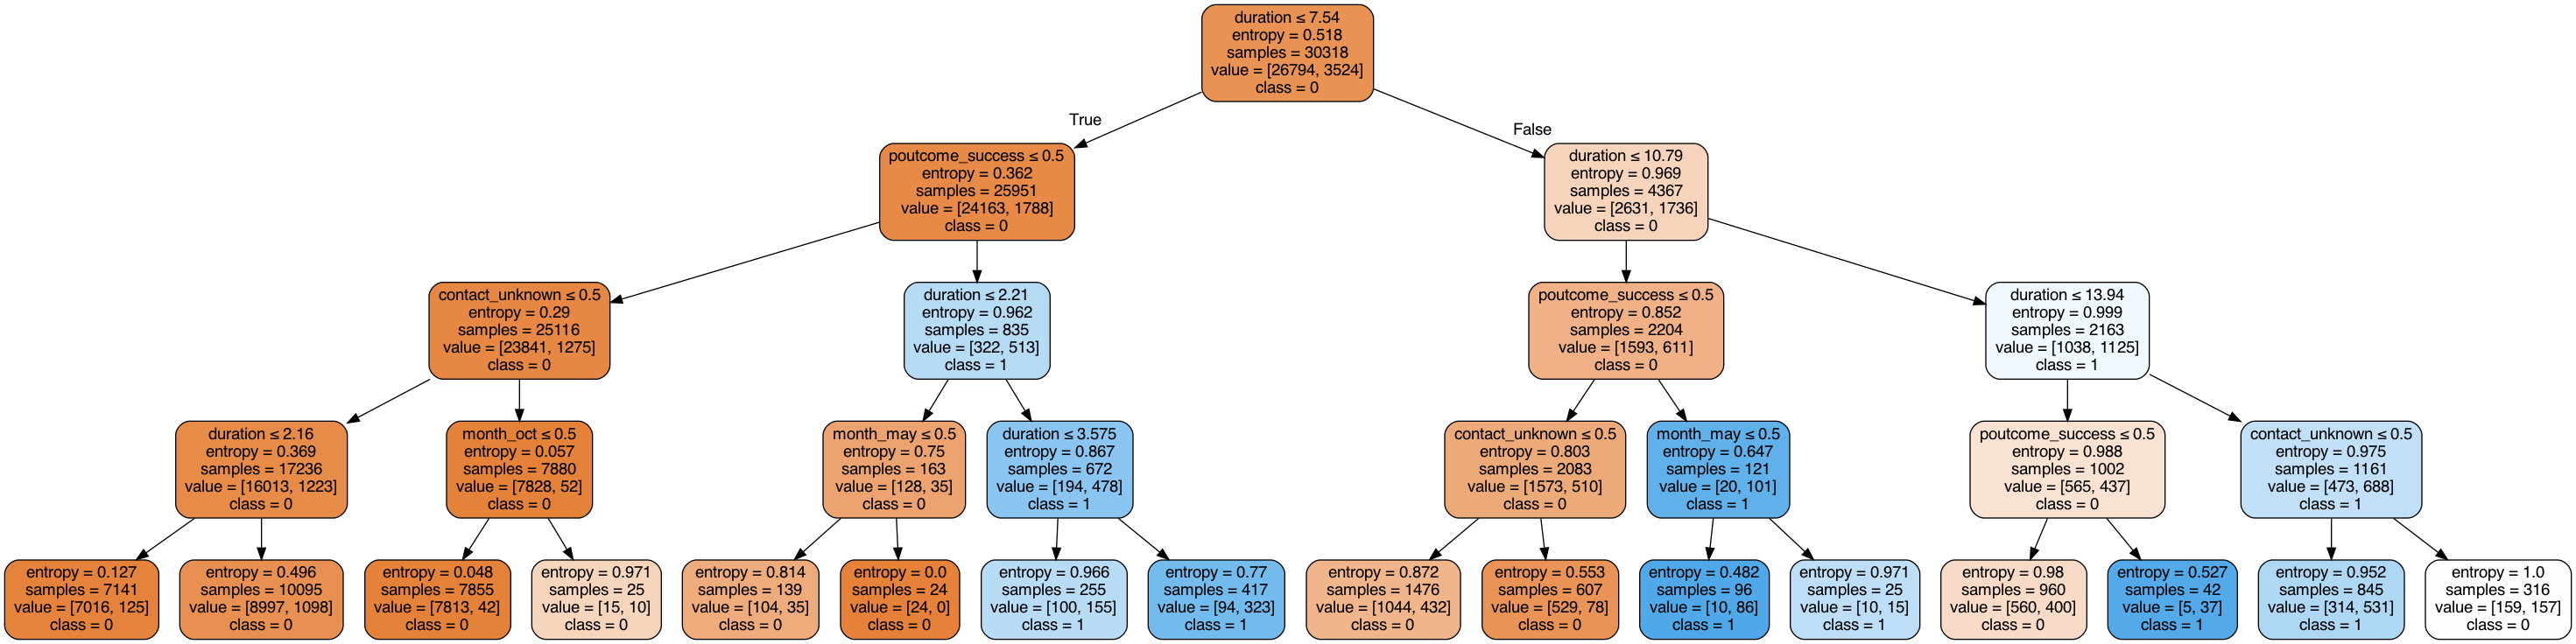

In [66]:
dot_data = StringIO()
tree.export_graphviz(clf_pruned, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('term_deposit.png')
Image(graph.create_png())

In [67]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [68]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])


Predicted,0,1
Actual,,
0,11281,255
1,992,466


/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


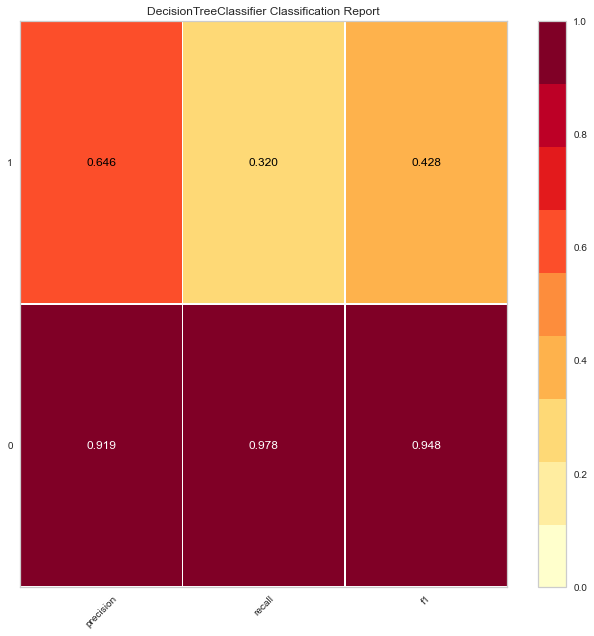

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


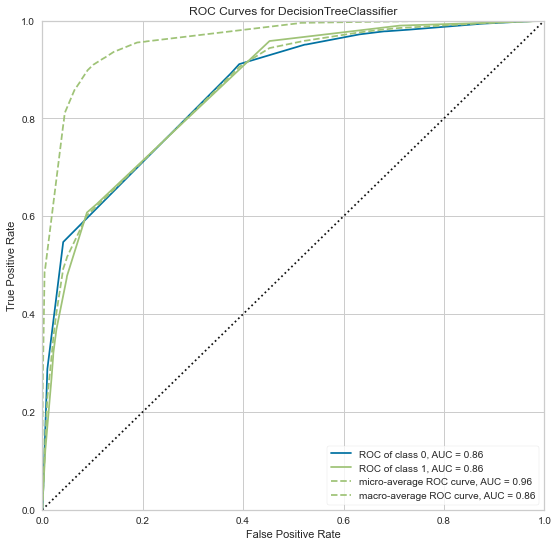

In [69]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [70]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.585677
poutcome_success,0.296443
contact_unknown,0.104399
month_oct,0.010068
month_may,0.003413
age,0.000000
month_feb,0.000000
housing_yes,0.000000
loan_yes,0.000000
contact_telephone,0.000000


In [71]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.894413
0,Decision Tree,0.904033


In [72]:
# Apply the Random forest model and print the accuracy of Random forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [73]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.894413
0,Decision Tree,0.904033
0,Random Forest,0.907265


/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


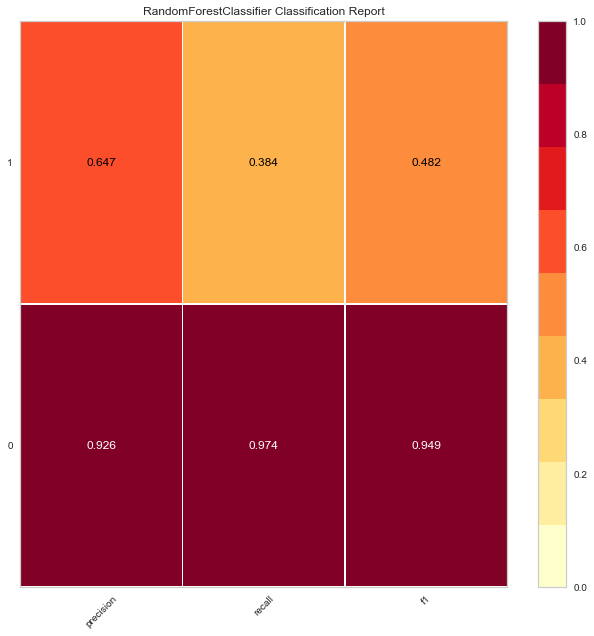

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


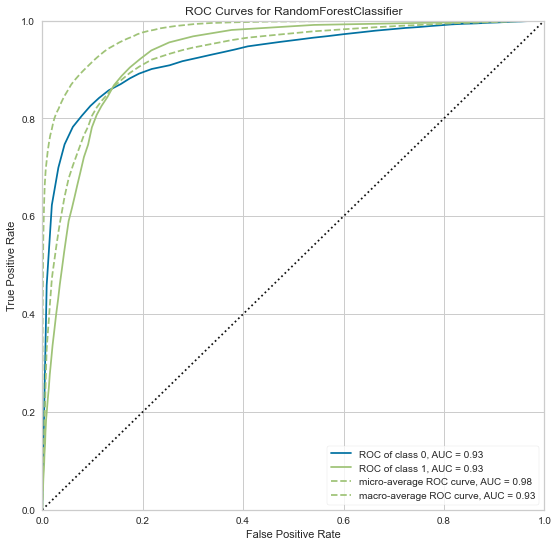

In [74]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [75]:
# Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [76]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [77]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.894413
0,Decision Tree,0.904033
0,Random Forest,0.907265
0,Adaboost,0.898415


/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


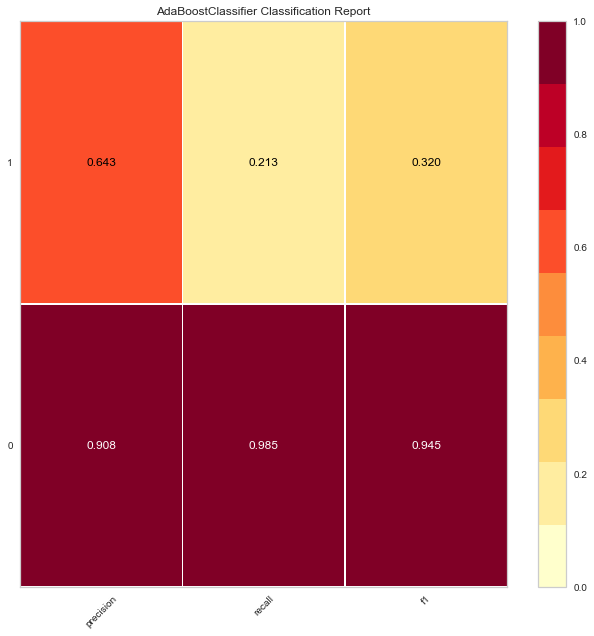

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


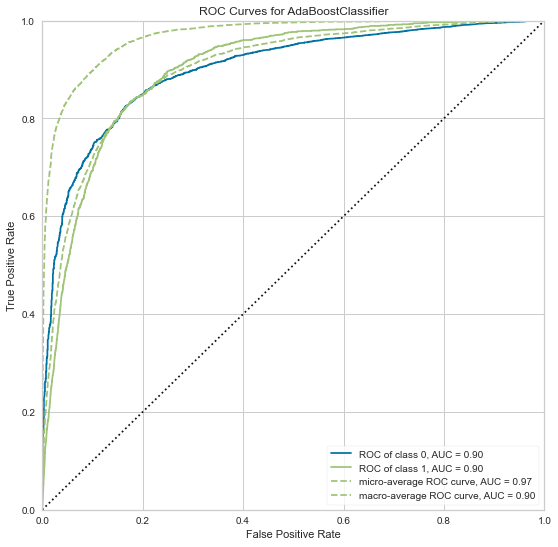

In [78]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [79]:
# Apply Bagging Classifier Algorithm and print the accuracy.

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)


In [80]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.894413
0,Decision Tree,0.904033
0,Random Forest,0.907265
0,Adaboost,0.898415
0,Bagging,0.906726


/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


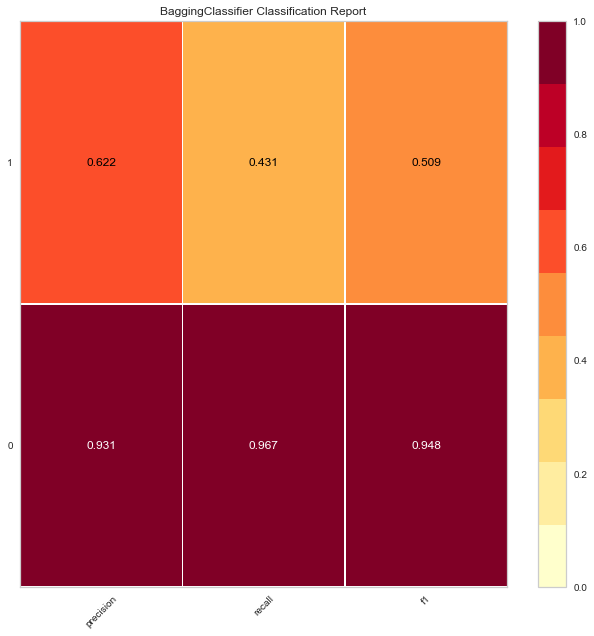

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


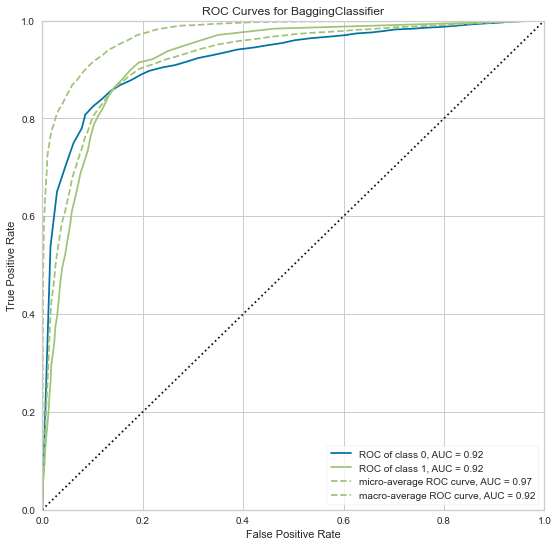

In [81]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [82]:
#Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [83]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.894413
0,Decision Tree,0.904033
0,Random Forest,0.907265
0,Adaboost,0.898415
0,Bagging,0.906726
0,Gradient Boost,0.904110


/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


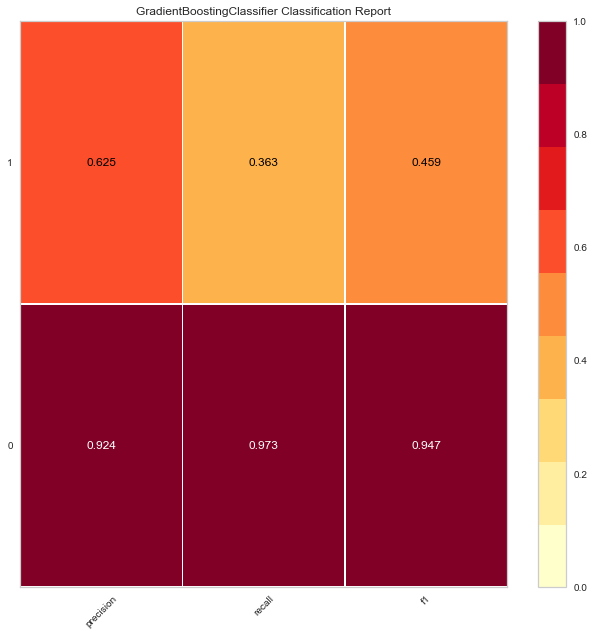

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


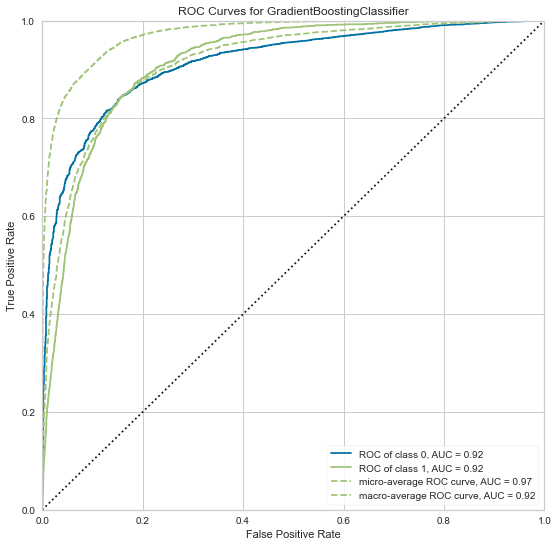

In [84]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [85]:
# For this dataset, Random forest and bagging models give the best results on test predictions

# Creating a function for visualizing classifier results
def visClassifierResults(model_w_parameters):
    viz = ClassificationReport(model_w_parameters)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()

    roc = ROCAUC(model_w_parameters)
    roc.fit(X_train, y_train)
    roc.score(X_test, y_test)
    roc.show()
    
    

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


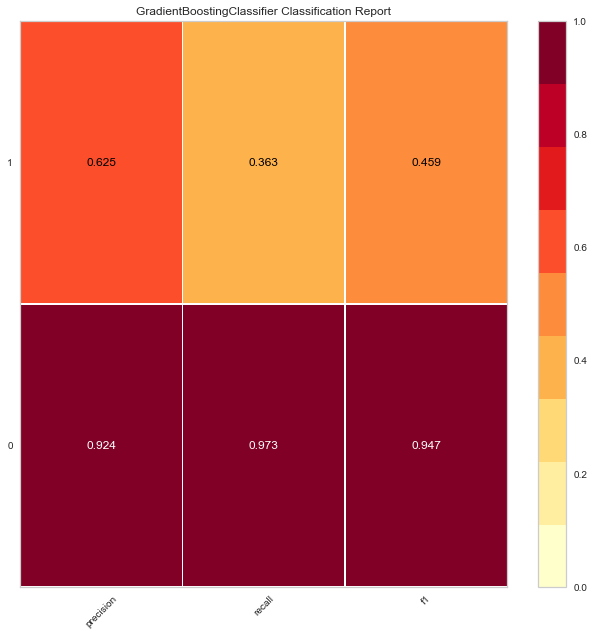

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


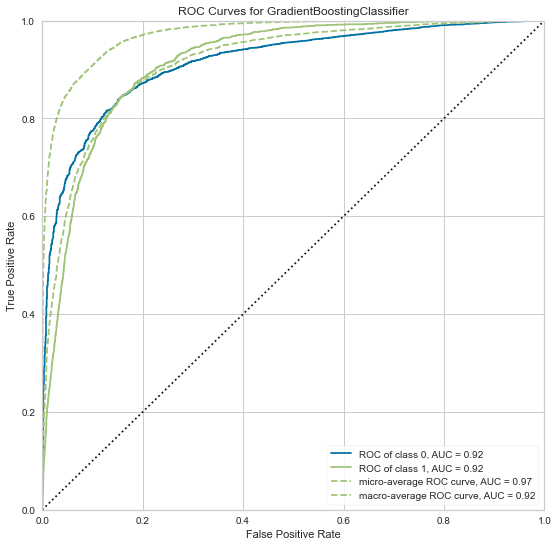

In [86]:
visClassifierResults(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


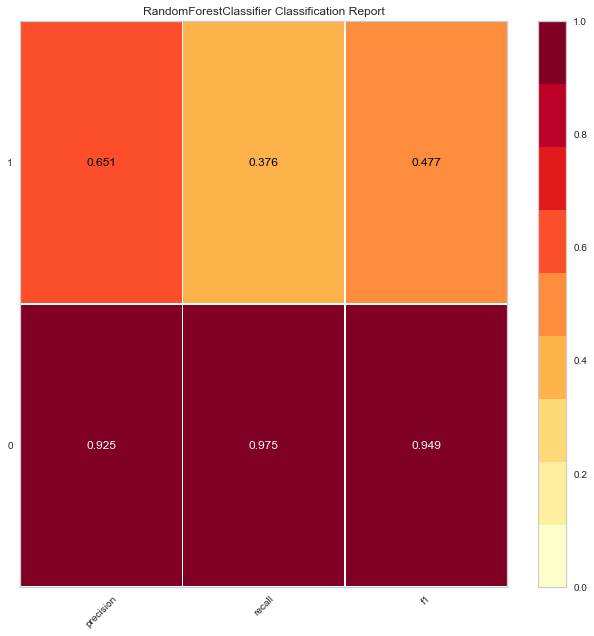

/Volumes/Mahadeep/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


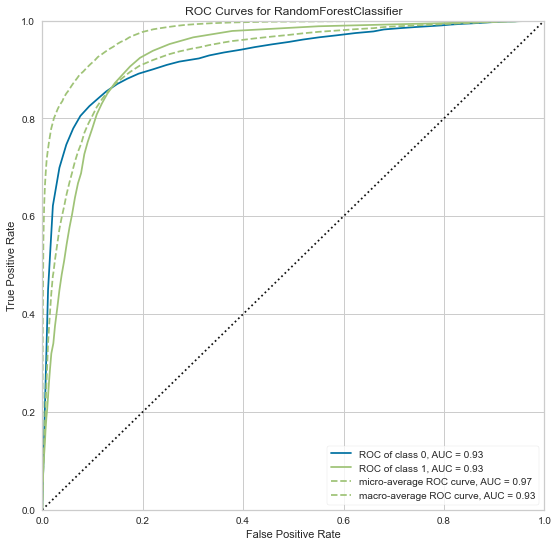

In [87]:
visClassifierResults(RandomForestClassifier(n_estimators = 50))

In [88]:
# Sort the Models based on highest accuracy
resultsDf.sort_values(["accuracy"], axis=0, 
                 ascending=False, inplace=True) 
resultsDf.reset_index(drop=True, inplace=True)


# Conclusion:

Based on listed classifiers and ensemble models, <b>Bagging</b> and <b>Random Forest</b> yields high accuracy and best performance than any other models.

In [89]:
resultsDf

,Method,accuracy
0,Random Forest,0.907265
1,Bagging,0.906726
2,Gradient Boost,0.904110
3,Decision Tree,0.904033
4,Adaboost,0.898415
5,Logistic Regression,0.894413
